Graphs S(V,T) and S(P,T) using the Sackur-Tetrode equation, https://en.wikipedia.org/wiki/Sackur%E2%80%93Tetrode_equation.

In [1]:
from numpy import *
from matplotlib.pyplot import *
from mpl_toolkits.mplot3d import axes3d

In [2]:
%matplotlib notebook

Function that gets S(T,V) using Sackur-Tetrode 

In [3]:
def SVT_sack(M,Trange,Vrange): 
    n = 1 
    h = 6.626e-34
    Na = 6.02e23
    k = 1.38e-23
    R = 8.314
    m = M/Na
    nT = len(Trange)
    nV = len(Vrange)
    S = np.zeros((nT,nV))
    Vgrid,Tgrid=meshgrid(Vrange,Trange)
    for iT in range(nT):
        T = Trange[iT]
        lambdax = h/(2*pi*k*T)**.5
        for iV in range(nV):
            V = Vrange[iV]
            Stemp = n*R*log(exp(5/2)*V/(n*Na*lambdax**3))
            S[iT,iV] = Stemp
    return S,Vgrid,Tgrid

Function that gets S(T,P) using Sackur-Tetrode 

In [4]:
def SPT_sack(M,Trange,Prange):
    n=1
    R = 8.314
    M = .040 # this is argon
    h = 6.626e-34
    Na = 6.02e23
    k = 1.38e-23
    R = 8.314
    Cp = 5/2*R
    Cp_liq = 22.6

    nT = len(Trange)
    nP = len(Prange)
    Pgrid,Tgrid=meshgrid(Prange,Trange)

    S = np.zeros((nT,nP))

    for iP in range(nP):
        P = Prange[iP]
        for iT in range(nT):
            T = Trange[iT]
            V = R*T/P
            lambdax = h/(2*np.pi*k*T)**.5
            S[iT,iP] = n*R*np.log(np.exp(5/2)*V/(n*Na*lambdax**3))
    return S,Pgrid,Tgrid

Define our system

In [5]:
M = .040 # For Argon

Graphing S(V,T)

<IPython.core.display.Javascript object>


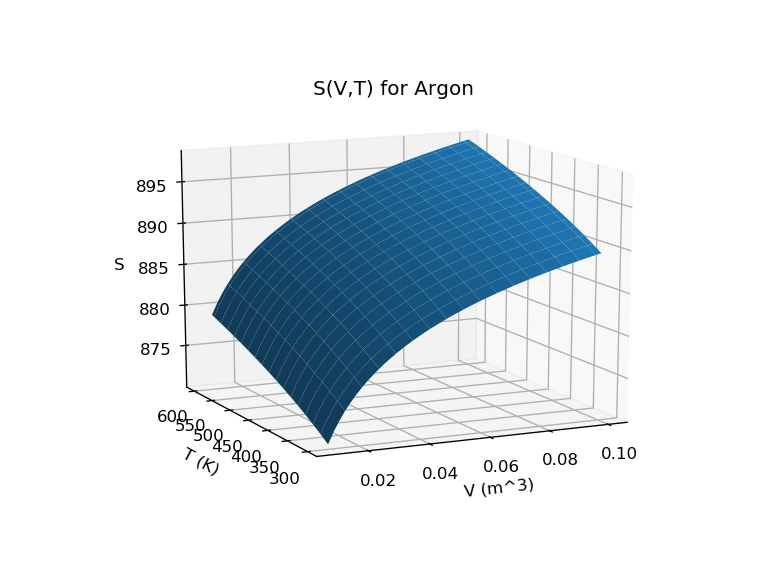

Text(0.5,0.92,'S(V,T) for Argon')

In [6]:
Trange = linspace(300,600);
Vrange = linspace(.01,.1);
SVT,Vgrid,Tgrid = SVT_sack(M,Trange,Vrange);
ax = figure().gca(projection='3d') # Set up a three dimensional graphics window 
ax.plot_surface(Vgrid, Tgrid, SVT, rstride=3,cstride=3) # Make the mesh plot
ax.set_xlabel('V (m^3)') # Label axes
ax.set_ylabel('T (K)')
ax.set_zlabel('S')
ax.set_title('S(V,T) for Argon')


Now S(P,T)

<IPython.core.display.Javascript object>


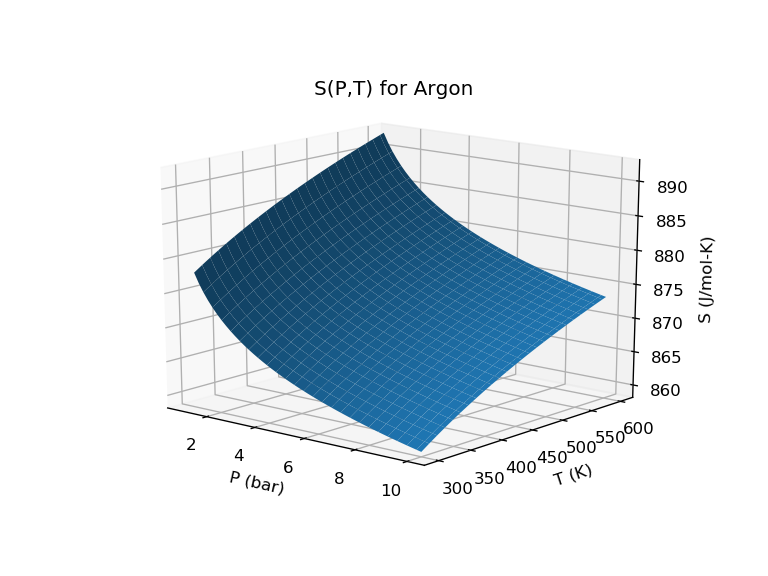

Text(0.5,0.92,'S(P,T) for Argon')

In [7]:
Trange = linspace(300,600);
Prange = linspace(1e5,10e5);
SPT,Pgrid,Tgrid = SPT_sack(M,Trange,Prange)
ax = figure().gca(projection='3d') # Set up a three dimensional graphics window 
ax.plot_surface(Pgrid/1e5, Tgrid, SPT, rstride=2,cstride=2) # Make the mesh plot
ax.set_xlabel('P (bar)') # Label axes
ax.set_ylabel('T (K)')
ax.set_zlabel('S (J/mol-K)')
ax.set_title('S(P,T) for Argon')